<a href="https://colab.research.google.com/github/zhekayur/CountryAnalysis2023/blob/main/Customer_Segmentation_with_E_Commerce_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or handle them as needed)
df = df.dropna()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [7]:
df = df.drop_duplicates()


In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
df['TotalPrice'].describe()

,TotalPrice
count,401604.000000
mean,20.613638
std,430.352218
min,-168469.600000
25%,4.250000
50%,11.700000
75%,19.800000
max,168469.600000


In [27]:
customer_df = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",  # Number of purchases
    "Quantity": "sum",       # Total quantity purchased
    "TotalPrice": "sum"      # Total monetary value
}).rename(columns={
    "InvoiceNo": "NumPurchases",
    "Quantity": "TotalQuantity",
    "TotalPrice": "MonetaryValue"
})

print(customer_df.head(50))
customer_df.describe()

            NumPurchases  TotalQuantity  MonetaryValue
CustomerID                                            
12346.0                2              0           0.00
12347.0                7           2458        4310.00
12348.0                4           2341        1797.24
12349.0                1            631        1757.55
12350.0                1            197         334.40
12352.0               11            470        1545.41
12353.0                1             20          89.00
12354.0                1            530        1079.40
12355.0                1            240         459.40
12356.0                3           1591        2811.43
12357.0                1           2708        6207.67
12358.0                2            248        1168.06
12359.0                6           1599        6182.98
12360.0                3           1165        2662.06
12361.0                1             91         189.90
12362.0               13           2212        5154.58
12363.0   

,NumPurchases,TotalQuantity,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,5.075480,1119.133349,1893.531433
std,9.338754,4672.995712,8218.696204
min,1.000000,-303.000000,-4287.630000
25%,1.000000,151.750000,291.795000
50%,3.000000,364.000000,644.070000
75%,5.000000,956.250000,1608.335000
max,248.000000,196719.000000,279489.020000


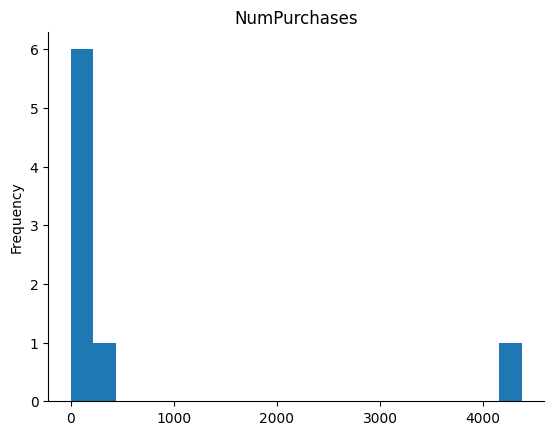

In [23]:
from matplotlib import pyplot as plt
_df_0['NumPurchases'].plot(kind='hist', bins=20, title='NumPurchases')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)

print(scaled_data[:50])  # Preview scaled data


[[-3.29362146e-01 -2.39516881e-01 -2.30419518e-01]
 [ 2.06102417e-01  2.86544195e-01  2.94054545e-01]
 [-1.15176321e-01  2.61503859e-01 -1.17174847e-02]
 [-4.36455059e-01 -1.04470283e-01 -1.65472702e-02]
 [-4.36455059e-01 -1.97354948e-01 -1.89727146e-01]
 [ 6.34474067e-01 -1.38927497e-01 -4.23621026e-02]
 [-4.36455059e-01 -2.35236482e-01 -2.19589312e-01]
 [-4.36455059e-01 -1.26086299e-01 -9.90697960e-02]
 [-4.36455059e-01 -1.88152089e-01 -1.74516181e-01]
 [-2.22269234e-01  1.00988885e-01  1.11696982e-01]
 [-4.36455059e-01  3.40049187e-01  5.24977676e-01]
 [-3.29362146e-01 -1.86439930e-01 -8.82809629e-02]
 [ 9.90095043e-02  1.02701044e-01  5.21973206e-01]
 [-2.22269234e-01  9.81637918e-03  9.35204874e-02]
 [-4.36455059e-01 -2.20041064e-01 -2.07311021e-01]
 [ 8.48659893e-01  2.33895284e-01  3.96829558e-01]
 [-3.29362146e-01 -1.52196735e-01 -1.63247898e-01]
 [-1.15176321e-01  8.27971876e-02 -7.06313763e-02]
 [-2.22269234e-01 -2.02491427e-01 -1.91395484e-01]
 [-4.36455059e-01 -2.02491427e-

In [13]:
from sklearn.cluster import KMeans

# Choose the number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(scaled_data)

print(customer_df.head())


            NumPurchases  TotalQuantity  MonetaryValue  Cluster
CustomerID                                                     
12346.0                2              0           0.00        0
12347.0                7           2458        4310.00        0
12348.0                4           2341        1797.24        0
12349.0                1            631        1757.55        0
12350.0                1            197         334.40        0


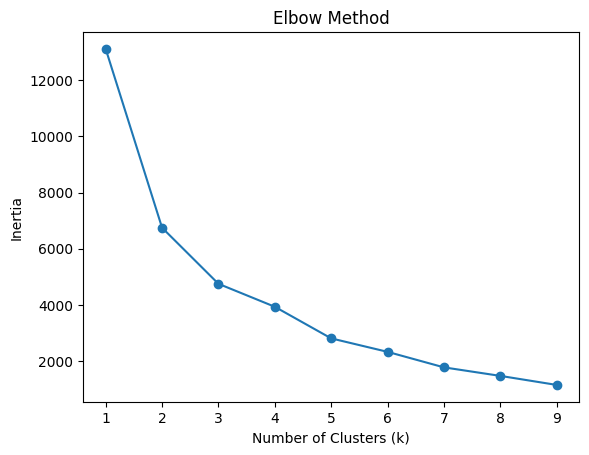

In [29]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [30]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.9619196142670007
Silhouette Score for k=3: 0.923697792345258
Silhouette Score for k=4: 0.8160363322644094
Silhouette Score for k=5: 0.7787721402239961
Silhouette Score for k=6: 0.6712569432777861
Silhouette Score for k=7: 0.6713405957794928
Silhouette Score for k=8: 0.6723607958979305
Silhouette Score for k=9: 0.6325705539755104


In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(scaled_data)


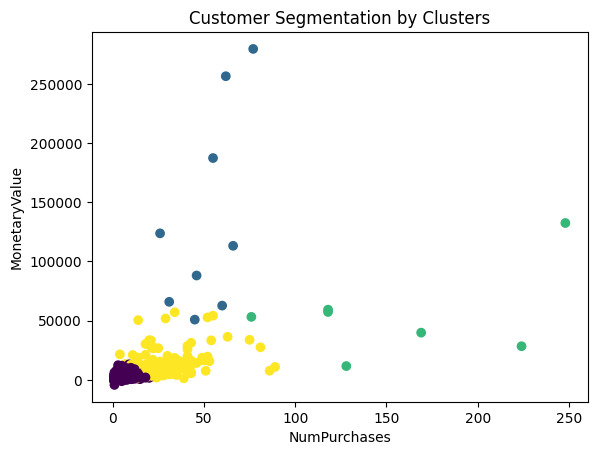

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two variables colored by cluster
plt.scatter(customer_df["NumPurchases"], customer_df["MonetaryValue"], c=customer_df["Cluster"], cmap="viridis")
plt.xlabel("NumPurchases")
plt.ylabel("MonetaryValue")
plt.title("Customer Segmentation by Clusters")
plt.show()


In [35]:
cluster_profile = customer_df.groupby("Cluster").mean()
print(cluster_profile)

         NumPurchases  TotalQuantity  MonetaryValue
Cluster                                            
0            3.669639     642.215663    1064.419440
1           52.000000   77369.111111  136417.795556
2          154.428571   33074.428571   54591.671429
3           26.271845    6309.771845   10928.528592


In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(scaled_data)


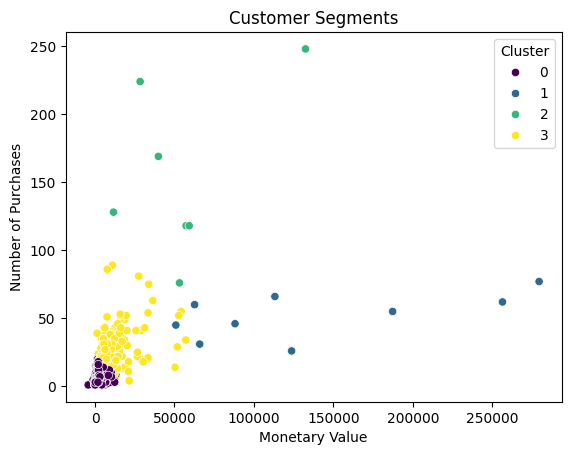

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x=customer_df["MonetaryValue"],
    y=customer_df["NumPurchases"],
    hue=customer_df["Cluster"],
    palette="viridis"
)
plt.title("Customer Segments")
plt.xlabel("Monetary Value")
plt.ylabel("Number of Purchases")
plt.show()


In [15]:
print(customer_df.groupby("Cluster").mean())

         NumPurchases  TotalQuantity  MonetaryValue
Cluster                                            
0            3.669639     642.215663    1064.419440
1           52.000000   77369.111111  136417.795556
2          154.428571   33074.428571   54591.671429
3           26.271845    6309.771845   10928.528592


<ipython-input-21-82093bb081c9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_df.groupby("Cluster")[["NumPurchases", "TotalQuantity", "MonetaryValue"]].mean().plot(kind="bar", figsize=(10, 6))


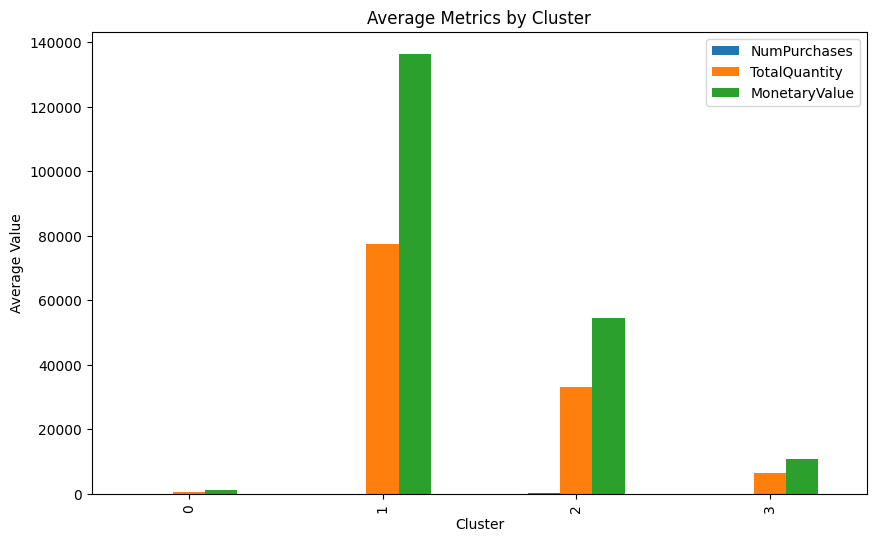

In [21]:
customer_df.groupby("Cluster")[["NumPurchases", "TotalQuantity", "MonetaryValue"]].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Average Metrics by Cluster")
plt.ylabel("Average Value")
plt.show()


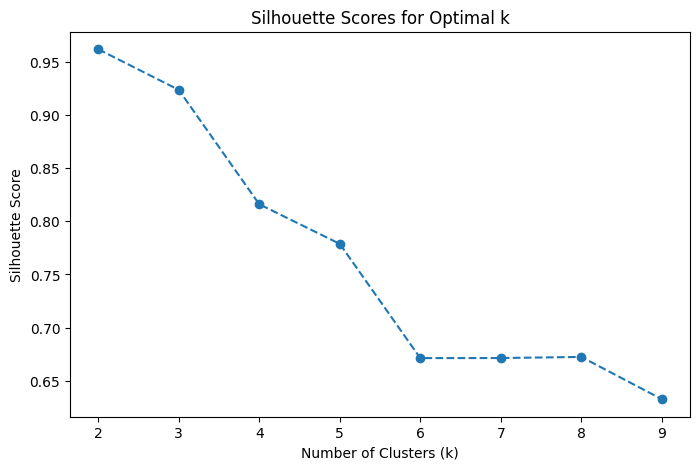

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


In [18]:
optimal_k = 4  # Replace with your chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(scaled_data)


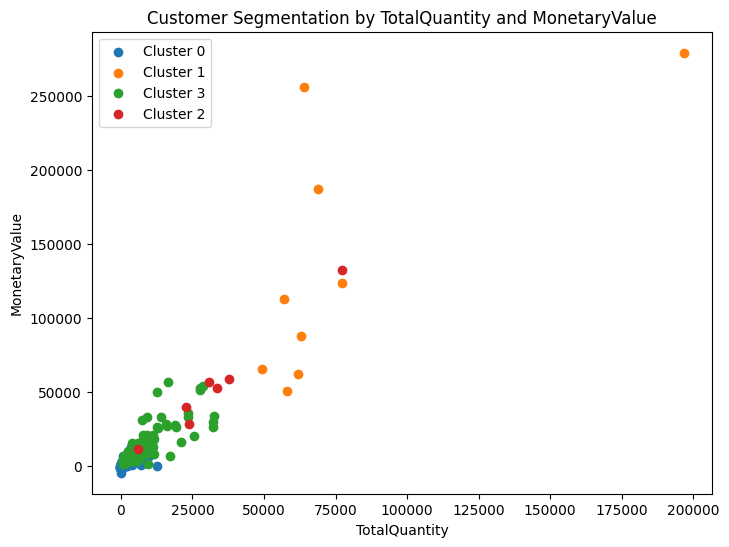

In [39]:
# Scatter plot: TotalQuantity vs. MonetaryValue
plt.figure(figsize=(8, 6))
for cluster in customer_df["Cluster"].unique():
    cluster_data = customer_df[customer_df["Cluster"] == cluster]
    plt.scatter(cluster_data["TotalQuantity"], cluster_data["MonetaryValue"], label=f"Cluster {cluster}")

plt.xlabel("TotalQuantity")
plt.ylabel("MonetaryValue")
plt.title("Customer Segmentation by TotalQuantity and MonetaryValue")
plt.legend()
plt.show()


In [40]:
# Profiling clusters
cluster_profiles = customer_df.groupby("Cluster").mean()
print(cluster_profiles)


         NumPurchases  TotalQuantity  MonetaryValue
Cluster                                            
0            3.669639     642.215663    1064.419440
1           52.000000   77369.111111  136417.795556
2          154.428571   33074.428571   54591.671429
3           26.271845    6309.771845   10928.528592


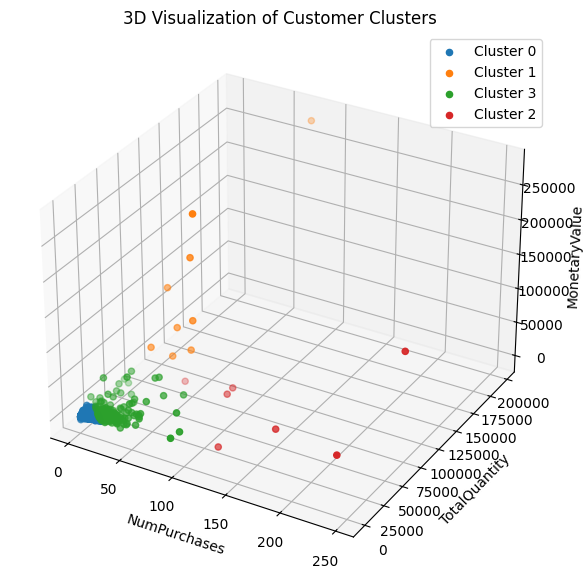

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in customer_df["Cluster"].unique():
    cluster_data = customer_df[customer_df["Cluster"] == cluster]
    ax.scatter(
        cluster_data["NumPurchases"],
        cluster_data["TotalQuantity"],
        cluster_data["MonetaryValue"],
        label=f"Cluster {cluster}"
    )

ax.set_xlabel("NumPurchases")
ax.set_ylabel("TotalQuantity")
ax.set_zlabel("MonetaryValue")
plt.title("3D Visualization of Customer Clusters")
plt.legend()
plt.show()
